In [1]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import time

from api_keys import weather_api_key
from citipy import citipy

In [3]:
long = (-180,180)
lat = (-90,90)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat[0], lat[1], size=1500)
lngs = np.random.uniform(long[0], long[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = 'imperial'

weather_df = pd.DataFrame(cities)
weather_df = weather_df.rename(columns = {0: 'City'})

weather_df['Longitude'] = ''
weather_df['Latitude'] = ''
weather_df['Temperature'] = ''
weather_df['Humidity'] = ''
weather_df['Cloudiness'] = ''
weather_df['Wind Speed'] = ''
weather_df['Country'] = ''
weather_df['Date'] = ''

weather_df

,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,,,,,,,,
1,neiafu,,,,,,,,
2,bayevo,,,,,,,,
3,cidreira,,,,,,,,
4,novaya zaimka,,,,,,,,
...,...,...,...,...,...,...,...,...,...
584,itinga,,,,,,,,
585,lamu,,,,,,,,
586,deputatskiy,,,,,,,,
587,westlock,,,,,,,,


In [6]:
for i, rows in weather_df.iterrows():
    query_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q=" + rows['City']
    response = requests.get(query_url)
    weather_data = response.json()
    if i % 50 == 0:
        time.sleep(30)
    try:
        weather_df.loc[i,'Longitude'] = weather_data['coord']['lon']
        weather_df.loc[i,'Latitude'] = weather_data['coord']['lat']
        weather_df.loc[i,'Temperature'] = weather_data['main']['temp_max']
        weather_df.loc[i,'Humidity'] = weather_data['main']['humidity']
        weather_df.loc[i,'Cloudiness'] = weather_data['clouds']['all']
        weather_df.loc[i,'Wind Speed'] = weather_data['wind']['speed']
        weather_df.loc[i,'Country'] = weather_data['sys']['country']
        weather_df.loc[i,'Date'] = weather_data['dt']
        print(f'Download {i+1} of {len(weather_df)} complete')
    
    except (KeyError , IndexError):
        print(f'Download {i+1} of {len(weather_df)}, city not found')

Download 1 of 589 complete
Download 2 of 589 complete
Download 3 of 589 complete
Download 4 of 589 complete
Download 5 of 589 complete
Download 6 of 589 complete
Download 7 of 589 complete
Download 8 of 589 complete
Download 9 of 589 complete
Download 10 of 589 complete
Download 11 of 589 complete
Download 12 of 589 complete
Download 13 of 589 complete
Download 14 of 589 complete
Download 15 of 589 complete
Download 16 of 589 complete
Download 17 of 589 complete
Download 18 of 589 complete
Download 19 of 589 complete
Download 20 of 589 complete
Download 21 of 589 complete
Download 22 of 589 complete
Download 23 of 589 complete
Download 24 of 589 complete
Download 25 of 589 complete
Download 26 of 589 complete
Download 27 of 589 complete
Download 28 of 589 complete
Download 29 of 589, city not found
Download 30 of 589 complete
Download 31 of 589 complete
Download 32 of 589 complete
Download 33 of 589 complete
Download 34 of 589 complete
Download 35 of 589, city not found
Download 36 of 

Download 282 of 589 complete
Download 283 of 589, city not found
Download 284 of 589 complete
Download 285 of 589 complete
Download 286 of 589 complete
Download 287 of 589 complete
Download 288 of 589 complete
Download 289 of 589 complete
Download 290 of 589 complete
Download 291 of 589, city not found
Download 292 of 589 complete
Download 293 of 589 complete
Download 294 of 589 complete
Download 295 of 589 complete
Download 296 of 589 complete
Download 297 of 589 complete
Download 298 of 589 complete
Download 299 of 589 complete
Download 300 of 589 complete
Download 301 of 589 complete
Download 302 of 589 complete
Download 303 of 589 complete
Download 304 of 589, city not found
Download 305 of 589 complete
Download 306 of 589 complete
Download 307 of 589 complete
Download 308 of 589 complete
Download 309 of 589 complete
Download 310 of 589, city not found
Download 311 of 589 complete
Download 312 of 589 complete
Download 313 of 589 complete
Download 314 of 589 complete
Download 315 of

Download 558 of 589 complete
Download 559 of 589 complete
Download 560 of 589 complete
Download 561 of 589 complete
Download 562 of 589, city not found
Download 563 of 589, city not found
Download 564 of 589 complete
Download 565 of 589 complete
Download 566 of 589 complete
Download 567 of 589 complete
Download 568 of 589 complete
Download 569 of 589 complete
Download 570 of 589 complete
Download 571 of 589 complete
Download 572 of 589 complete
Download 573 of 589, city not found
Download 574 of 589 complete
Download 575 of 589 complete
Download 576 of 589 complete
Download 577 of 589 complete
Download 578 of 589 complete
Download 579 of 589 complete
Download 580 of 589 complete
Download 581 of 589, city not found
Download 582 of 589 complete
Download 583 of 589 complete
Download 584 of 589 complete
Download 585 of 589 complete
Download 586 of 589 complete
Download 587 of 589 complete
Download 588 of 589 complete
Download 589 of 589, city not found


In [18]:
# Converts blank spaces to NAN
weather_df = weather_df.replace(r'^\s*$', np.NaN, regex=True)
weather_df = weather_df.dropna(how = 'any')
print(f'After removing NaN values there are {len(weather_df)} entries')
weather_df.head()

After removing NaN values there are 534 entries


,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-134.97,-23.12,74.48,80.0,100.0,18.48,PF,1.602898e+09
1,neiafu,-173.98,-18.65,77.00,83.0,75.0,17.22,TO,1.602898e+09
2,bayevo,80.77,53.28,46.63,55.0,100.0,13.98,RU,1.602898e+09
3,cidreira,-50.21,-30.18,64.27,78.0,0.0,19.19,BR,1.602898e+09
4,novaya zaimka,66.92,56.49,46.96,85.0,100.0,8.68,RU,1.602898e+09


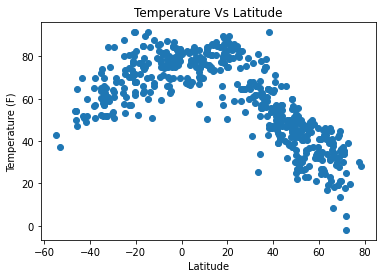

In [20]:
# Temperature Vs Latitude Scatter plot
latitude = weather_df['Latitude']
temperature = weather_df['Temperature']
plt.scatter(latitude,temperature, marker = 'o')
plt.title('Temperature Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

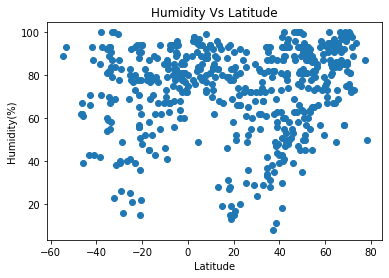

In [21]:
# Humidity (%) vs. Latitude
humidity = weather_df['Humidity']
plt.scatter(latitude,humidity, marker = 'o')
plt.title('Humidity Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()

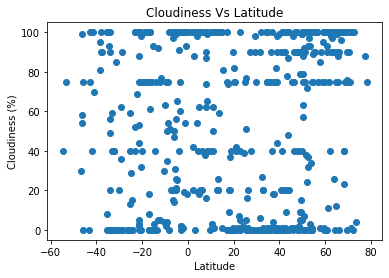

In [22]:
# Cloudiness (%) vs. Latitude
cloudiness = weather_df['Cloudiness']
plt.scatter(latitude,cloudiness, marker = 'o')
plt.title('Cloudiness Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

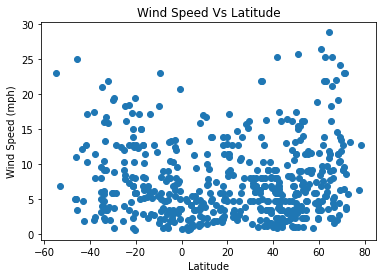

In [23]:
# Wind Speed (mph) vs. Latitude
wind = weather_df['Wind Speed']
plt.scatter(latitude,wind, marker = 'o')
plt.title('Wind Speed Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [24]:
# Test data
# url = "http://api.openweathermap.org/data/2.5/weather?"
# cities = ['New York City','London','Gitignore','Beijing','Cape Town','Syndey','Moscow']

# weather_df = pd.DataFrame(cities)
# weather_df = weather_df.rename(columns = {0: 'City'})

# weather_df['Longitude'] = ''
# weather_df['Latitude'] = ''
# weather_df['Temperature'] = ''
# weather_df['Humidity'] = ''
# weather_df['Cloudiness'] = ''
# weather_df['Wind Speed'] = ''
# weather_df['Country'] = ''
# weather_df['Date'] = ''

# weather_df

## Starter code needed for a loop
# for i in range(10):
#     query_url = url + "appid=" + weather_api_key + "&q=" + cities[i]
#     response = requests.get(query_url)
#     response_json = response.json()
#     print(f'City name: {cities[i]}')


In [25]:
temp = weather_data['main']['temp_max']
humidity = weather_data['main']['humidity']
cloudiness = weather_data['clouds']['all']
wind_speed = weather_data['wind']['speed']

print(temp)
print(humidity)
print(cloudiness)
print(wind_speed)

KeyError: 'main'

In [ ]:
#weather_data